In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [15]:
data_path = "/content/drive/My Drive/Colab Notebooks/housing.csv"

In [17]:
#column names for house features
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#assigning columns names to our data
data=pd.read_csv(data_path,header=None,delimiter=r"\s+", names=column_names)

In [18]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**From the shared information this dataset containes 14 attributes(columns) namely:**

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft. 

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per dollars 10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in dollars 1000's

In [19]:
data.shape

(506, 14)

In [20]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [21]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [22]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


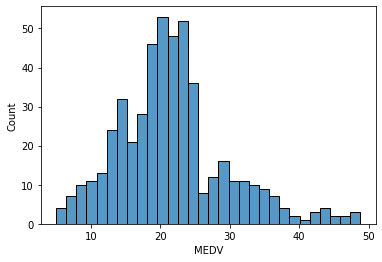

In [33]:
sns.histplot(data['MEDV'], bins=30)
plt.show()

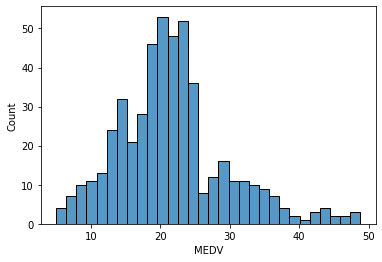

In [34]:
data=data[~(data["MEDV"]>=50)]
sns.histplot(data['MEDV'], bins=30)
plt.show()

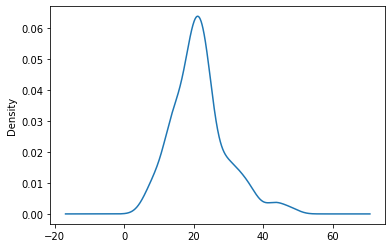

In [41]:
# Density Graph for the data
ser = pd.Series(data["MEDV"])
ser.plot.kde();

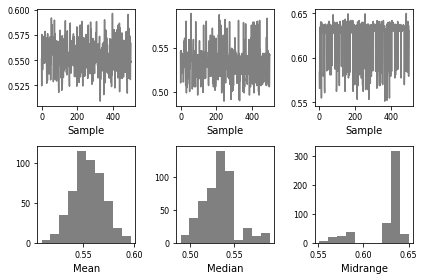

In [44]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(data["NOX"], size=50, samples=500, color="grey");

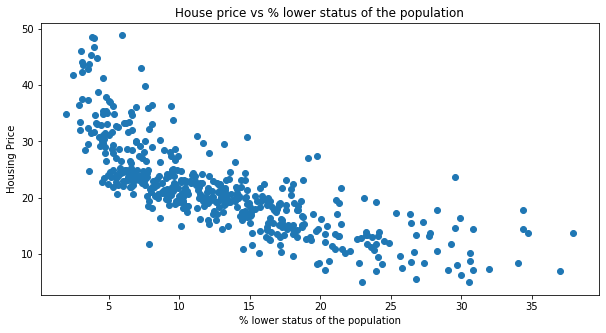

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(data.LSTAT,data.MEDV)
plt.xlabel("% lower status of the population")
plt.ylabel("Housing Price")
plt.title("House price vs % lower status of the population");

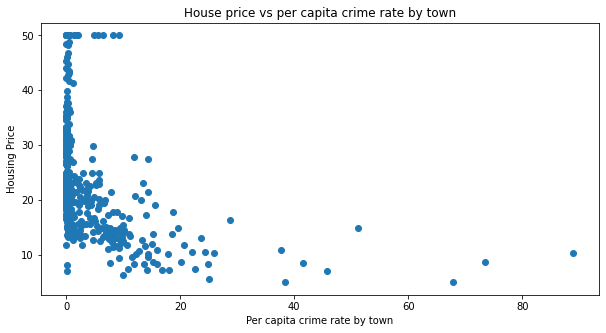

In [24]:
plt.figure(figsize=(10, 5))

plt.scatter(data.CRIM,data.MEDV)
plt.xlabel("Per capita crime rate by town")
plt.ylabel("Housing Price")
plt.title("House price vs per capita crime rate by town");

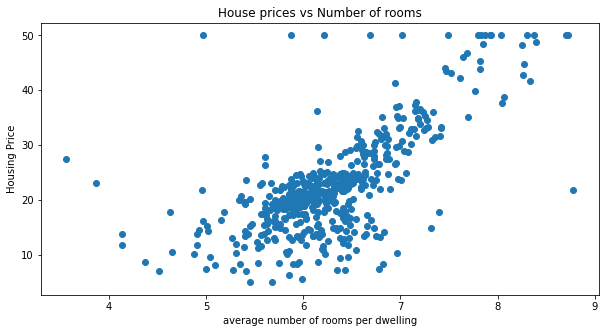

In [25]:
plt.figure(figsize=(10,5))

plt.scatter(data.RM,data.MEDV)
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("House prices vs Number of rooms");

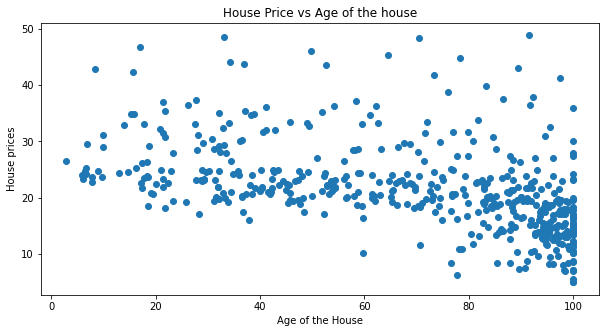

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(data.AGE,data.MEDV)
plt.xlabel("Age of the House")
plt.ylabel("House prices")
plt.title("House Price vs Age of the house");

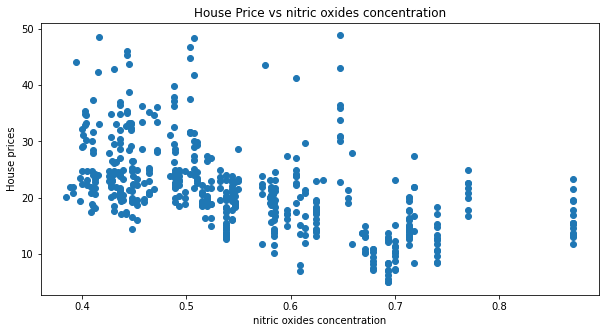

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(data.NOX,data.MEDV)
plt.xlabel("nitric oxides concentration")
plt.ylabel("House prices")
plt.title("House Price vs nitric oxides concentration");

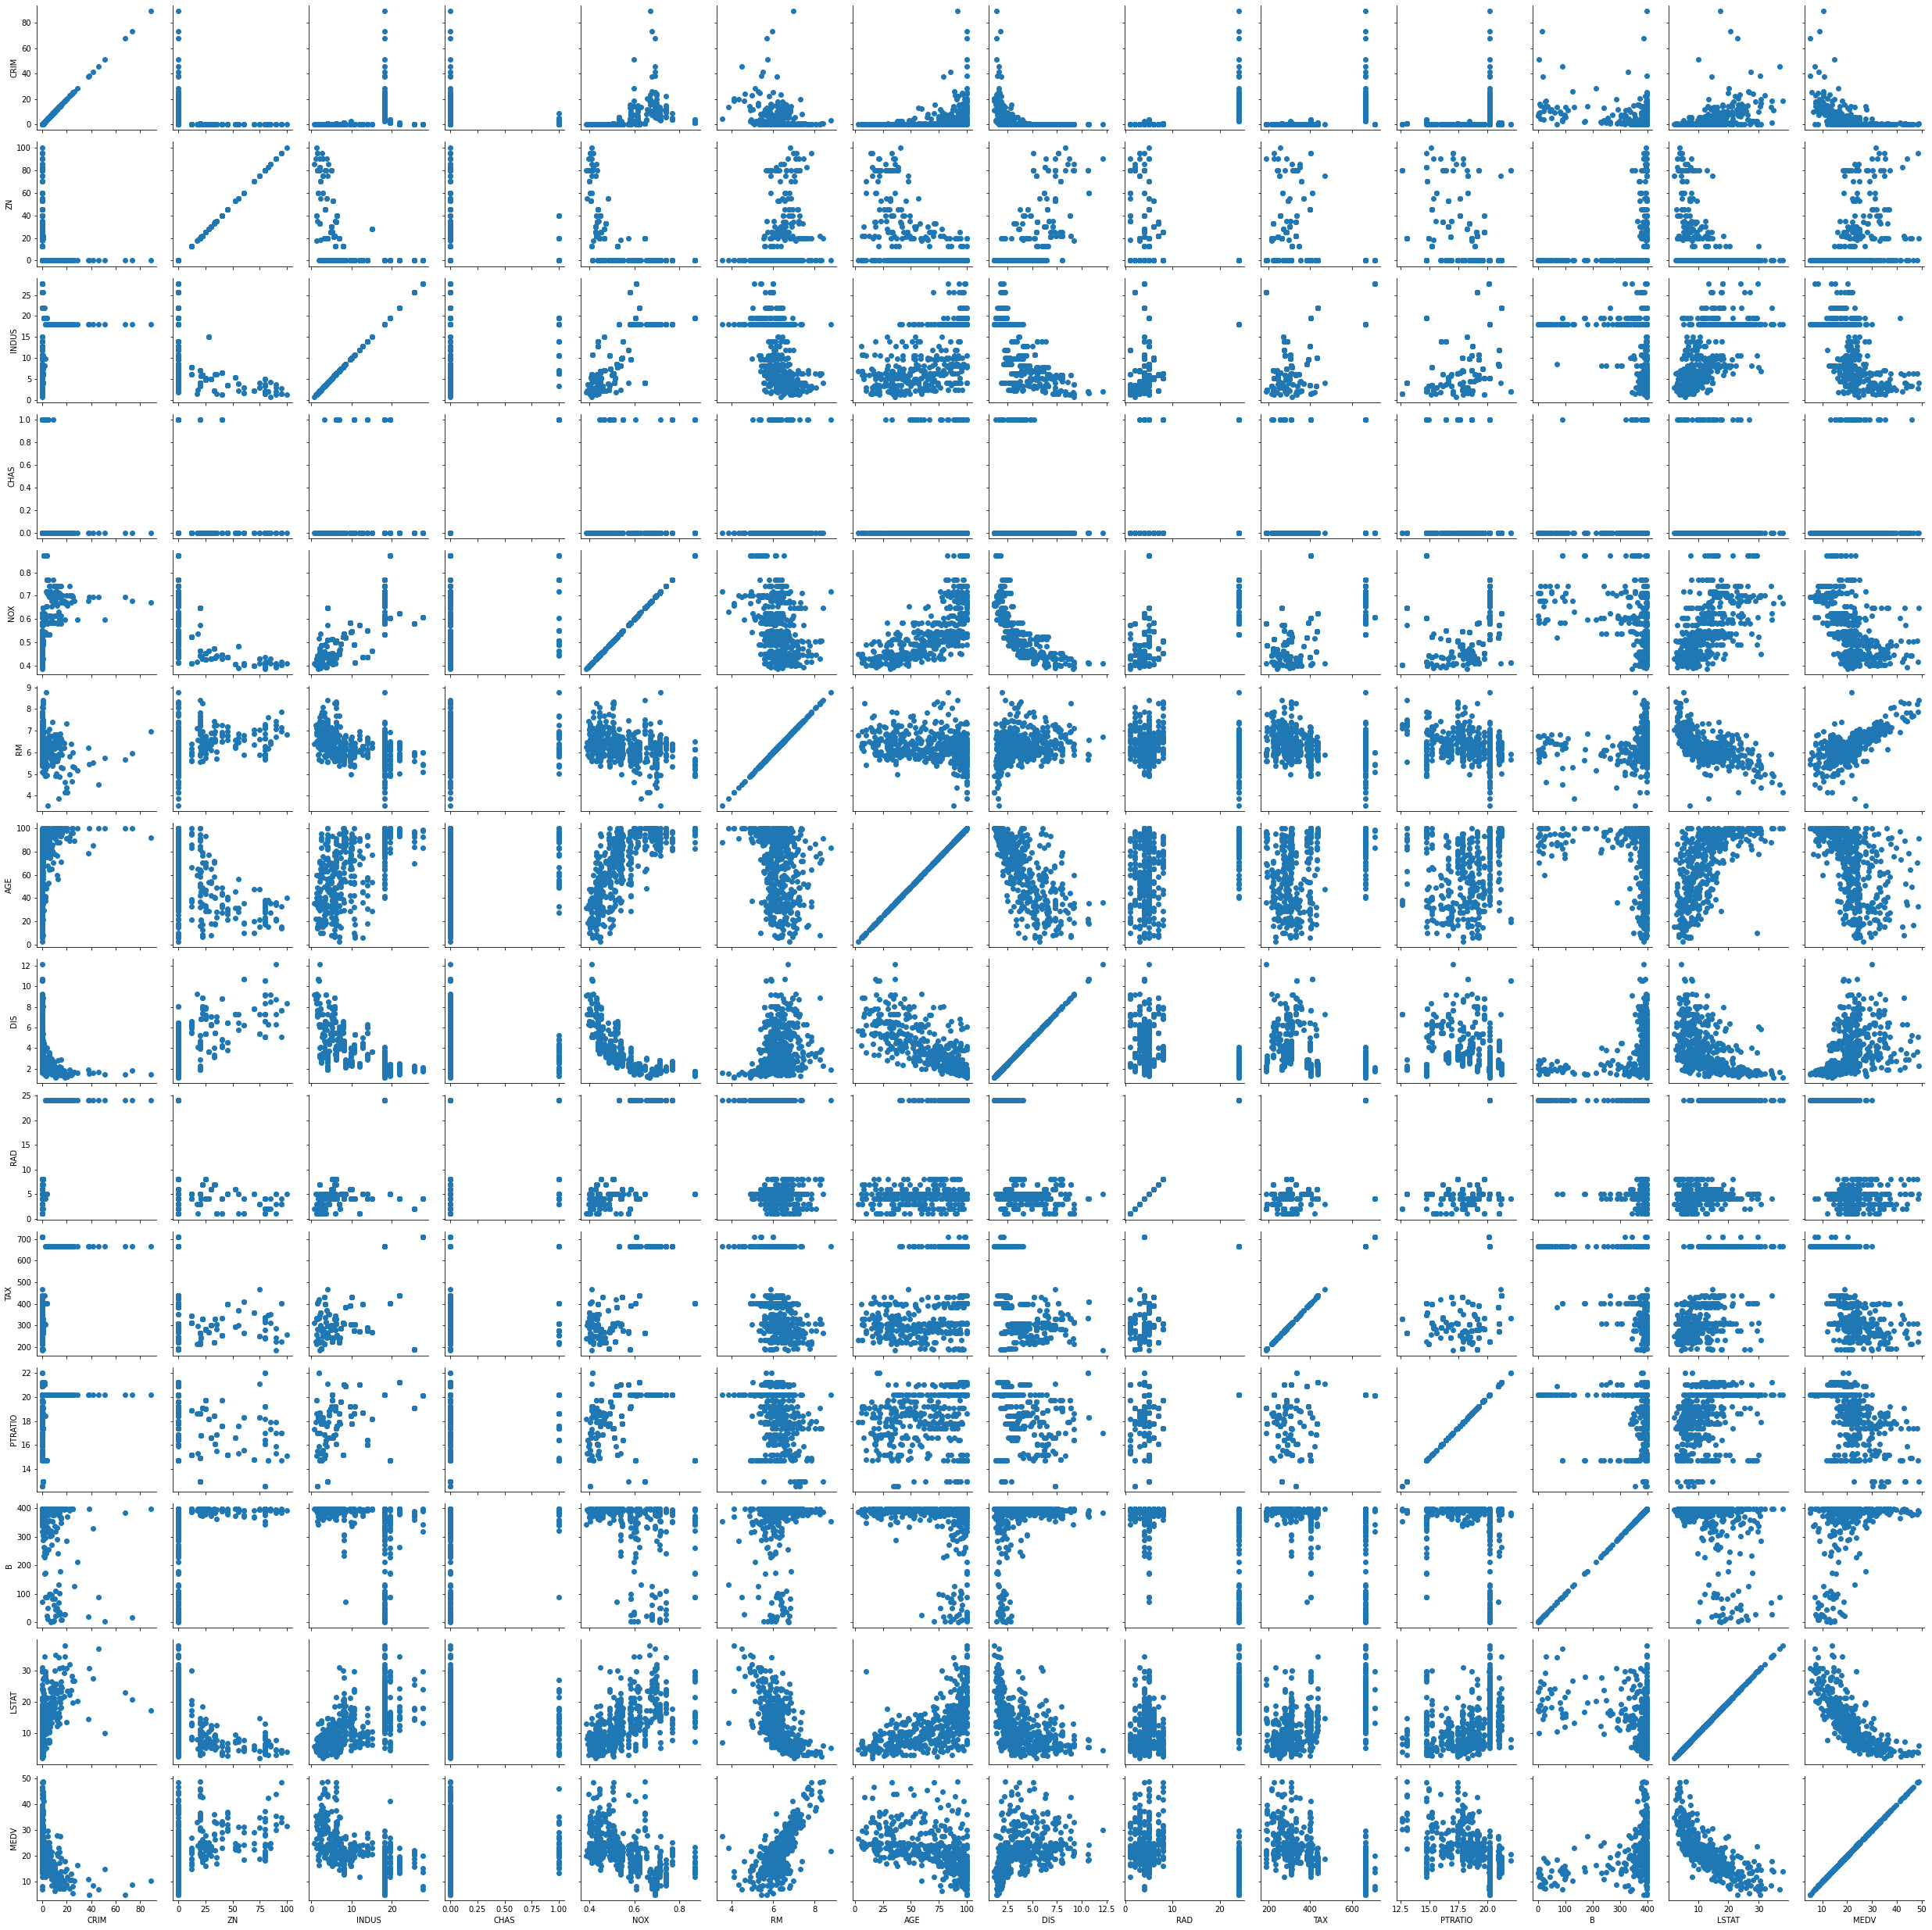

In [35]:
g = sns.PairGrid(data)
g.map(plt.scatter);

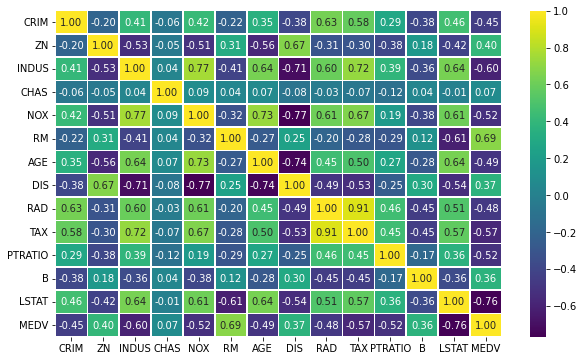

In [36]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="viridis");